## 04 - part 3 - Filtering in the frequency domain

In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import time

In [2]:
img1 = imageio.imread("images/pattern.png")
img2 = imageio.imread("images/gradient_noise.png")
img3 = imageio.imread("images/board.jpg")

In [3]:
# implementing a 2D version of the DFT
def DFT2D(f):
    # create empty array of complex coefficients
    F = np.zeros(f.shape, dtype=np.complex64)
    n,m = f.shape[0:2]
    
    # creating indices for x, to compute multiplication using numpy (f*exp)
    x = np.arange(n)
    # for each frequency 'u,v'
    for u in np.arange(n):
        for v in np.arange(m):
            for y in np.arange(m):
                F[u,v] += np.sum(f[:,y] * np.exp( (-1j*2*np.pi) * (((u*x)/n)+((v*y)/m)) ))
    
    return F/np.sqrt(n*m)

In [4]:
# implementing a 2D version of the DFT
def IDFT2D(F):
    # create empty array of complex coefficients
    f = np.zeros(F.shape, dtype=np.int32)
    n,m = F.shape[0:2]
    
    # creating indices for x, to compute multiplication using numpy (f*exp)
    u = np.arange(n)
    # for each frequency 'u,v'
    for x in np.arange(n):
        for y in np.arange(m):
            for v in np.arange(m):
                f[x,y] += np.real(np.sum(F[:,v] * np.exp( (1j*2*np.pi) * (((u*x)/n)+((v*y)/m)) )))
    
    return np.real(f/np.sqrt(n*m))

In [5]:
# extracting subimages with 64x64=4096 pixels
sizes = 64
img1_s = img1[:sizes, :sizes]
img2_s = img2[:sizes, :sizes]
img3_s = img3[5:sizes+5, 5:sizes+5]

F1s = DFT2D(img1_s)
F2s = DFT2D(img2_s)
F3s = DFT2D(img3_s)

Visualizing the **Power Spectrum** $|F(u,v)|^2$

(-0.5, 63.5, 63.5, -0.5)

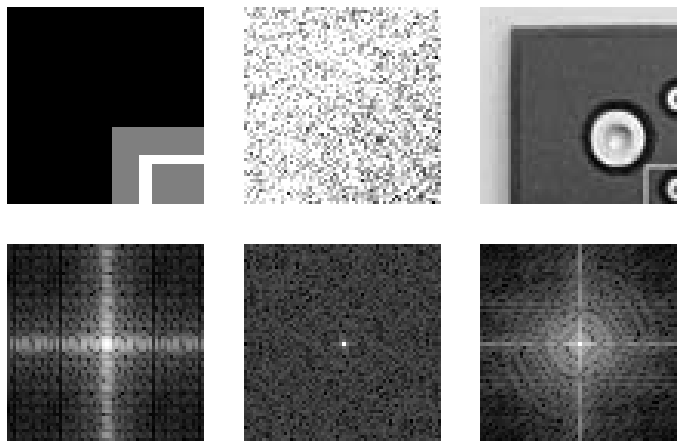

In [6]:
plt.figure(figsize=(12,8)) 
plt.subplot(231)
plt.imshow(img1_s, cmap="gray"); plt.axis('off')
plt.subplot(232)
plt.imshow(img2_s, cmap="gray"); plt.axis('off')
plt.subplot(233)
plt.imshow(img3_s, cmap="gray"); plt.axis('off')

# the log of the magnitudes 
plt.subplot(234)
plt.imshow(np.log(1 + np.fft.fftshift(np.abs(F1s))), cmap="gray")
plt.axis('off')
plt.subplot(235)
plt.imshow(np.log(1 + np.fft.fftshift(np.abs(F2s))), cmap="gray")
plt.axis('off')
plt.subplot(236)
plt.imshow(np.log(1 + np.fft.fftshift(np.abs(F3s))), cmap="gray")
plt.axis('off')

It is possible to notice the different frequency patterns that arise from different images.

1. the first one (leftmost) contains mainly horizontal and vertical oscilations,
2. the second (in the middle) is only noise so the spectrum is aproximately uniform, 
3. the last (right-most) has horizontal, vertical but also circular patterns, which shows on the spectrum.


---
Let us now filter frequencies in those images in order to see the effects of filters:
* high passs
* low pass
* band stop

In [7]:
n2 = F1s.shape[0]//2
m2 = F1s.shape[1]//2

F1p = np.fft.fftshift(F1s.copy())
F1p[n2-9:n2+9, m2-9:m2+9] = 0 # square high pass filter, removes first frequencies
F1p = np.fft.ifftshift(F1p)
    
F2p = np.fft.fftshift(F2s).copy()
F2p[:n2-9, :] = 0 # square low pass filter, removes higher frequencies
F2p[:, :m2-9] = 0 # square low pass filter, removes higher frequencies
F2p[n2+9:, :] = 0 # square low pass filter, removes higher frequencies
F2p[:, m2+9:] = 0 # square low pass filter, removes higher frequencies
F2p = np.fft.ifftshift(F2p)

F3p = F3s.copy()
F3p[5:-5,5:-5] = 0 # band stop filter
#F3p = np.fft.ifftshift(F3p)

i1p = IDFT2D(F1p)
i2p = IDFT2D(F2p)
i3p = IDFT2D(F3p)

Text(0.5, 1.0, 'original')

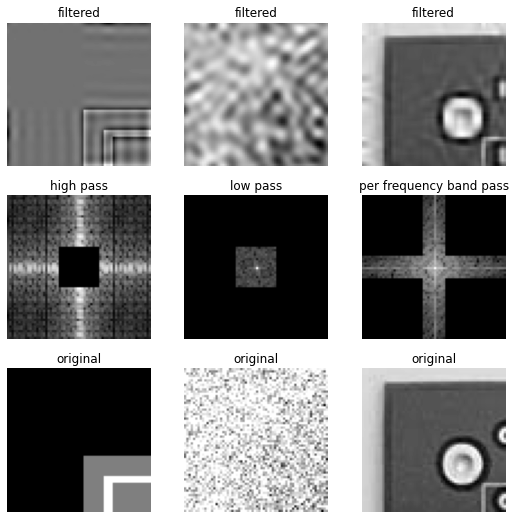

In [8]:
plt.figure(figsize=(9,9)) 
plt.subplot(331)
plt.imshow(i1p, cmap="gray"); plt.axis('off'); plt.title('filtered')
plt.subplot(332)
plt.imshow(i2p, cmap="gray"); plt.axis('off'); plt.title('filtered')
plt.subplot(333)
plt.imshow(i3p, cmap="gray"); plt.axis('off'); plt.title('filtered')

# the log of the magnitudes 
plt.subplot(334)
plt.imshow(np.log(1 + np.fft.fftshift(np.abs(F1p))), cmap="gray")
plt.axis('off'); plt.title('high pass')
plt.subplot(335)
plt.imshow(np.log(1 + np.fft.fftshift(np.abs(F2p))), cmap="gray")
plt.axis('off'); plt.title('low pass')
plt.subplot(336)
plt.imshow(np.log(1 + np.fft.fftshift(np.abs(F3p))), cmap="gray")
plt.axis('off'); plt.title('per frequency band pass')

plt.subplot(337)
plt.imshow(img1_s, cmap="gray"); plt.axis('off'); plt.title('original')
plt.subplot(338)
plt.imshow(img2_s, cmap="gray"); plt.axis('off'); plt.title('original')
plt.subplot(339)
plt.imshow(img3_s, cmap="gray"); plt.axis('off'); plt.title('original')